In [1]:
#importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.datasets import fetch_openml

In [3]:
housing = fetch_openml(name='house_prices', as_frame=True)

In [4]:
x = housing['data']

In [5]:
y = housing.target

In [6]:
data = pd.concat([x,y], axis=1)

In [7]:
data.shape

(1460, 81)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   float64
 1   MSSubClass     1460 non-null   float64
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   float64
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   float64
 18  OverallC

In [9]:
#checking the null values in the datset
data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [10]:
#finding out the categorical features
categorical_feature = [feature for feature in data.columns if data[feature].dtypes=='O']
categorical_feature

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [11]:
#finding out the continuous features
continuous_feature = [feature for feature in data.columns if feature not in categorical_feature]
continuous_feature

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [12]:
#number of missing features
missing_feature = [feature for feature in data.columns if data[feature].isnull().sum()>1]
missing_feature

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [13]:
#missing values in percentage
round(data[missing_feature].isnull().mean()*100, 2)

LotFrontage     17.74
Alley           93.77
MasVnrType       0.55
MasVnrArea       0.55
BsmtQual         2.53
BsmtCond         2.53
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtFinType2     2.60
FireplaceQu     47.26
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
PoolQC          99.52
Fence           80.75
MiscFeature     96.30
dtype: float64

# observation

1. features alley, poolqc, fence, miscfeature contain more than 80 percent missing values
so we can remove these features as they dont create any impact on the model

2. rest of the features can be imputed by their mean

In [14]:
#to find the categories inside the each feature
data[categorical_feature].nunique()

MSZoning          5
Street            2
Alley             2
LotShape          4
LandContour       4
Utilities         2
LotConfig         5
LandSlope         3
Neighborhood     25
Condition1        9
Condition2        8
BldgType          5
HouseStyle        8
RoofStyle         6
RoofMatl          8
Exterior1st      15
Exterior2nd      16
MasVnrType        4
ExterQual         4
ExterCond         5
Foundation        6
BsmtQual          4
BsmtCond          4
BsmtExposure      4
BsmtFinType1      6
BsmtFinType2      6
Heating           6
HeatingQC         5
CentralAir        2
Electrical        5
KitchenQual       4
Functional        7
FireplaceQu       5
GarageType        6
GarageFinish      3
GarageQual        5
GarageCond        5
PavedDrive        3
PoolQC            3
Fence             4
MiscFeature       4
SaleType          9
SaleCondition     6
dtype: int64

# observation

1. feature neighbourhood has more than 25 categories
2. features exterior1st and exterior2nd has more than 15 categories
3. totally 13 features which are over 5 categories
4. rest of the features are within 5 categories

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning

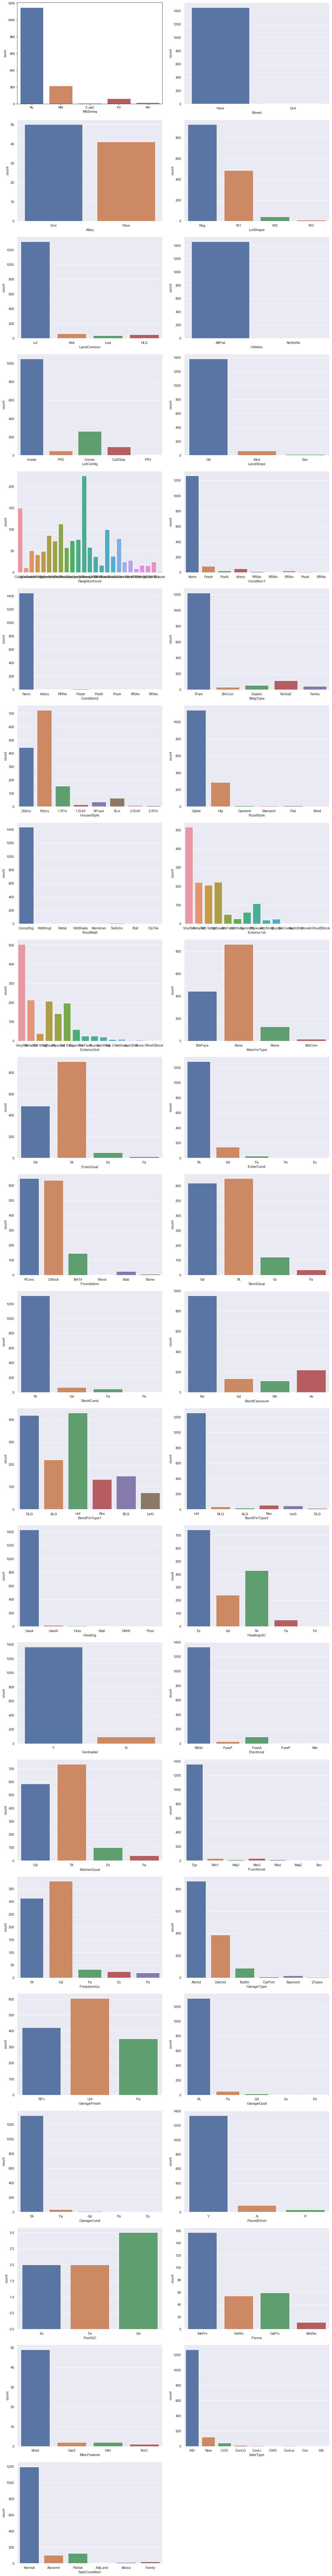

In [15]:
#to see the imbalance of the datasets
plt.figure(figsize=(15, 120))
for i in range (len(categorical_feature)):
    plt.subplot(23,2, i+1)
    sns.set_theme()
    sns.countplot(data[categorical_feature[i]])
    plt.tight_layout()

# observation

Almost all the features have imbalance dataset

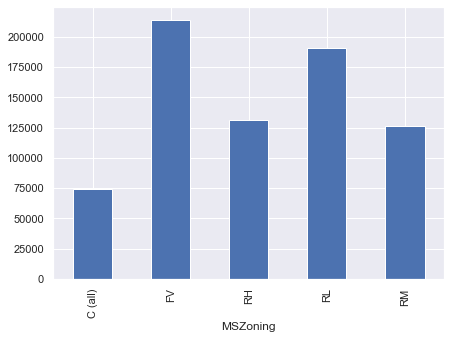

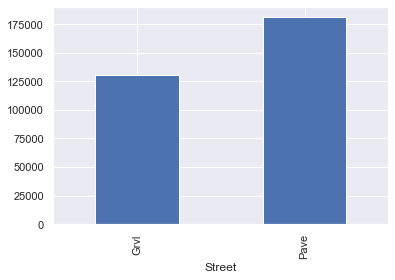

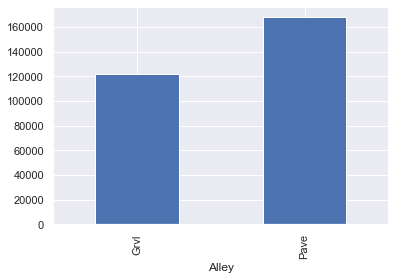

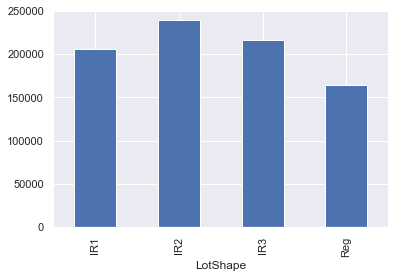

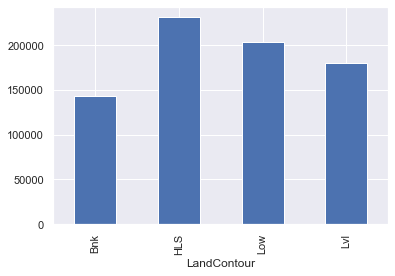

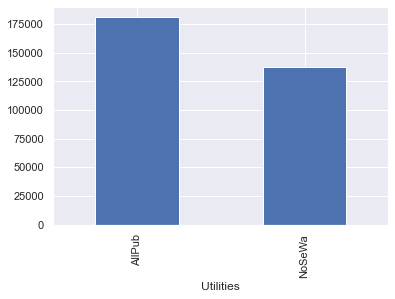

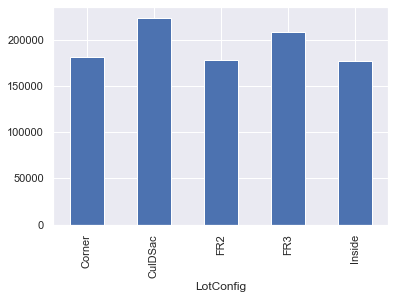

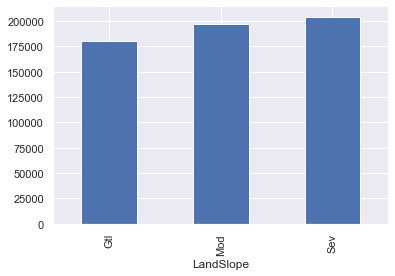

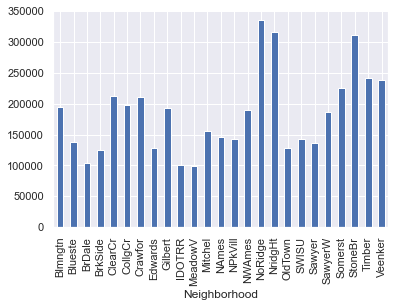

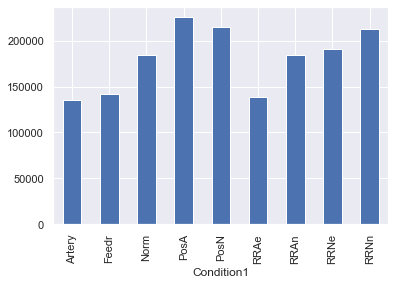

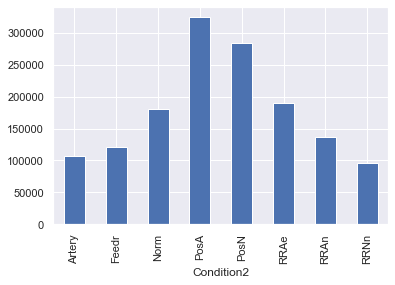

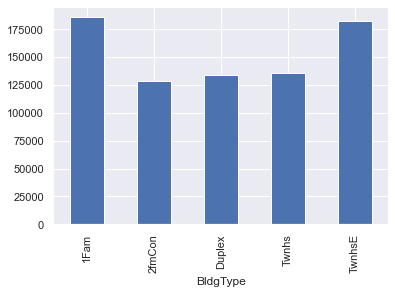

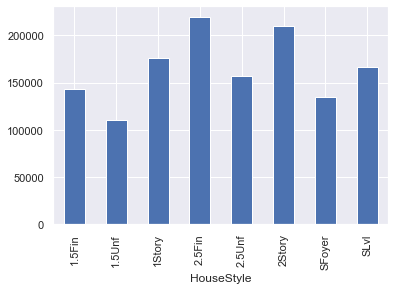

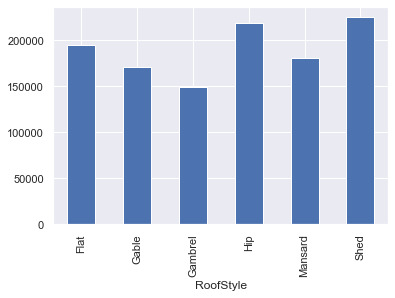

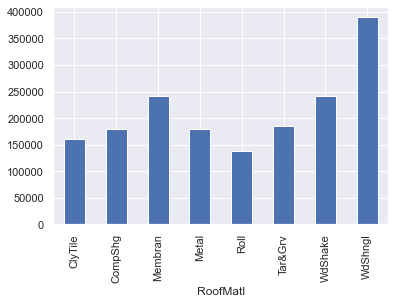

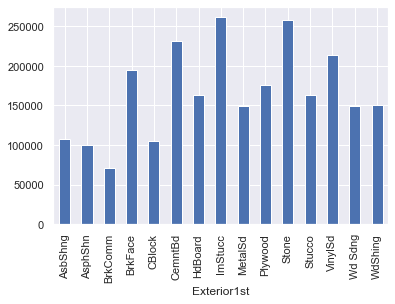

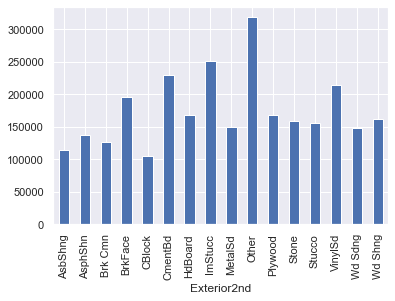

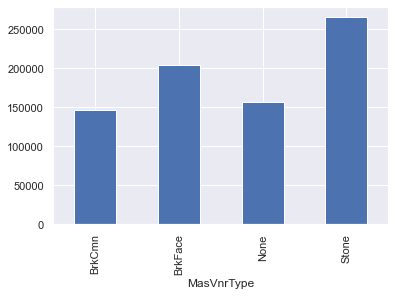

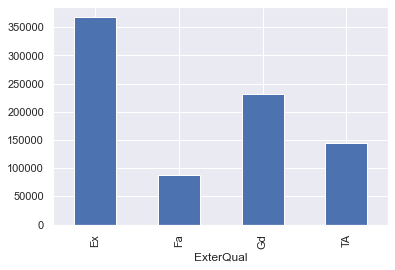

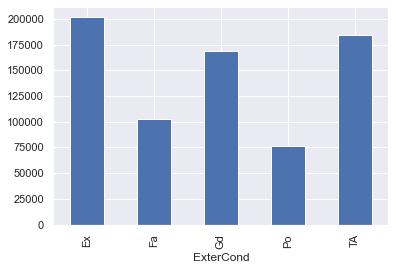

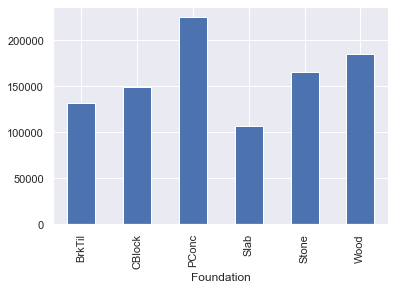

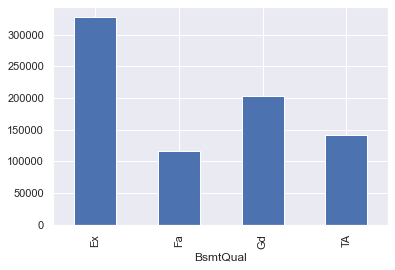

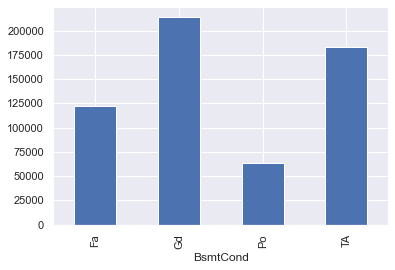

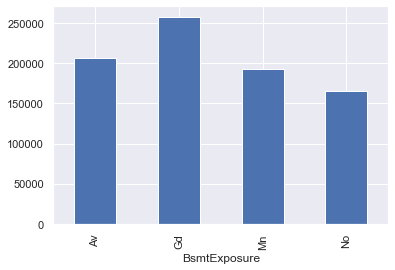

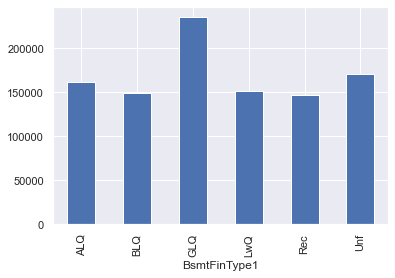

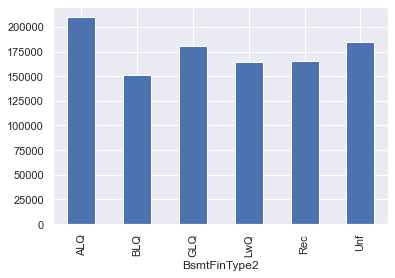

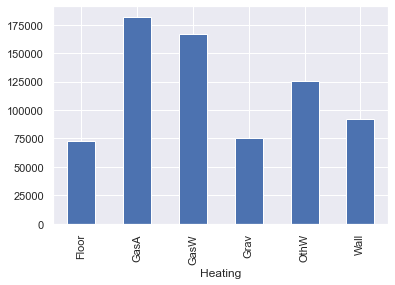

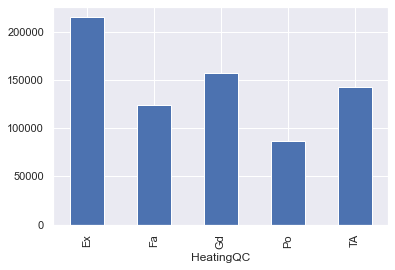

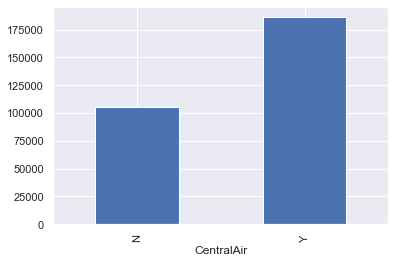

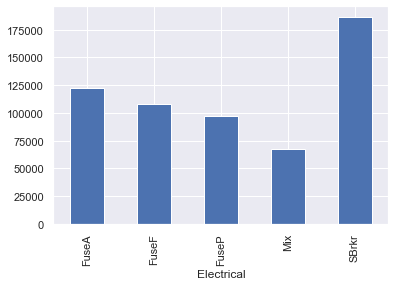

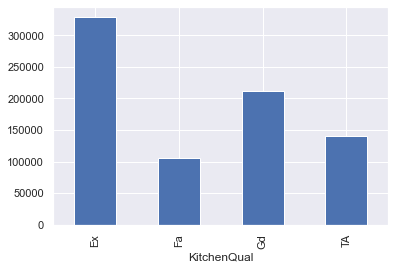

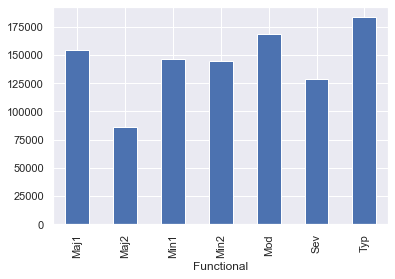

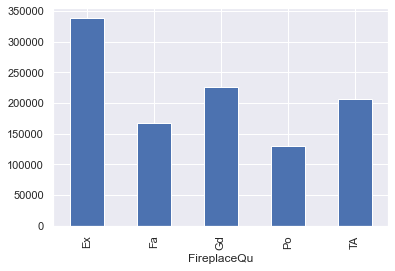

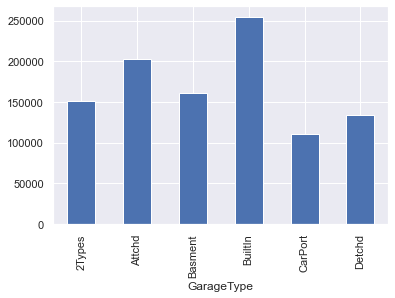

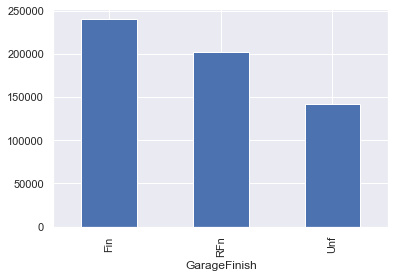

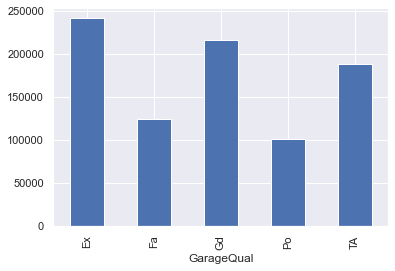

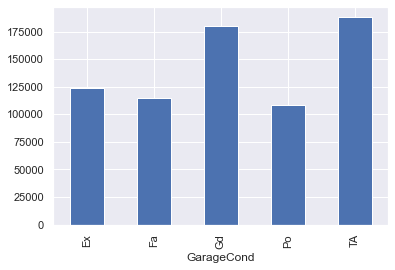

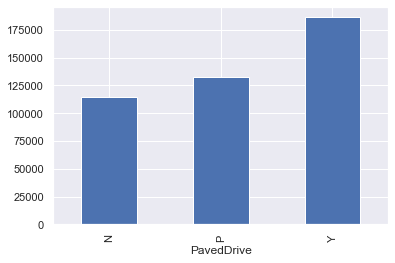

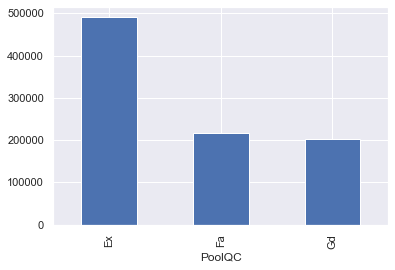

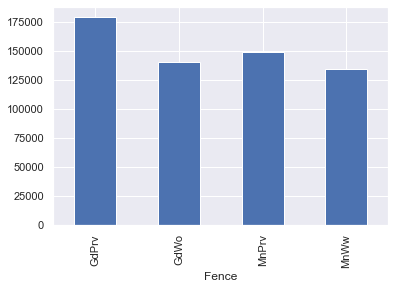

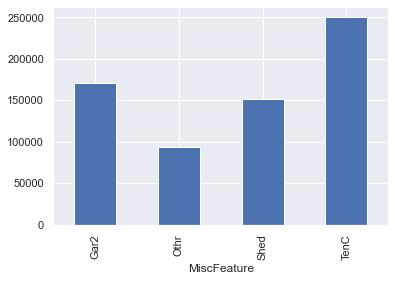

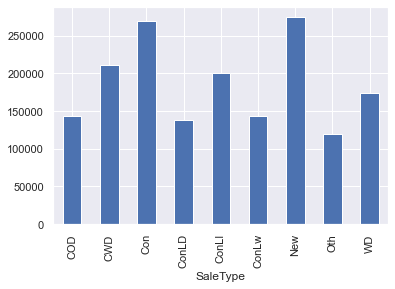

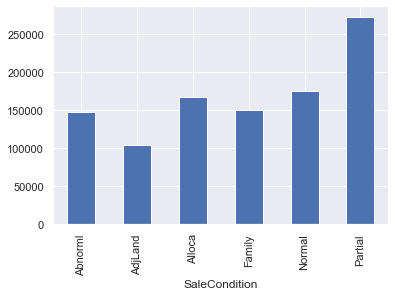

In [16]:
#comparing the categorical features with target variables

plt.figure(figsize=(7,5))
for i in range(len(categorical_feature)):
    data.groupby(categorical_feature[i])['SalePrice'].agg('mean').plot(kind='bar')
    plt.show()

# observation

1. In MSZoning, FV category has high mean saleprice value
2. In street, pave has high mean saleprice value
3. In alley, pave has high mean value 
4. In LotShape, IR2 has highest mean saleprice value followed by IR3 and IR1
5. In LandContour, HLS has highest value
6. In utilities, AllPub has high mean saleprice value
7. LotConfiguration, culDsac has high mean value
8. In Landslope, Sev has high value
9. No ridge neighbourhood has high mean saleprice value

C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

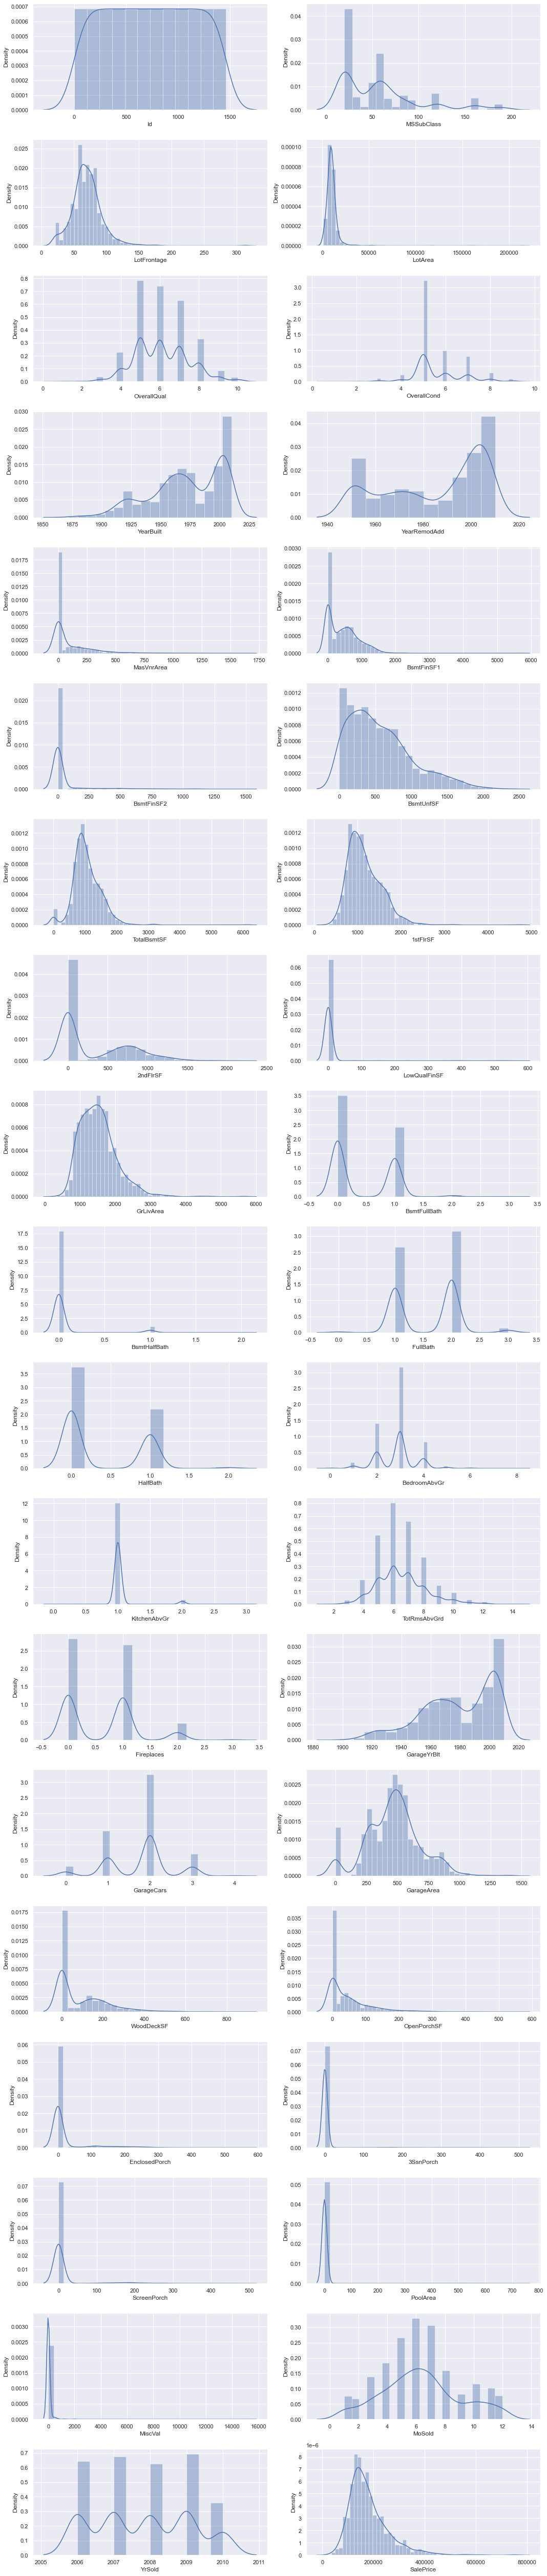

In [17]:
plt.figure(figsize=(15,110))
for i in range(len(continuous_feature)):
    plt.subplot(30,2, i+1)
    sns.distplot(data[continuous_feature[i]])
    plt.tight_layout()

# observation

this continuous features contains discrete features and year features  as well. so need to
seperate out those features.

In [18]:
continuous_feature = [feature for feature in continuous_feature if feature not in ['YearBuilt',
 'YearRemodAdd','GarageYrBlt', 'YrSold' ]]

In [19]:
#creating year features 
year_feature = ['YearBuilt',
 'YearRemodAdd','GarageYrBlt', 'YrSold' ]
year_feature
print('Total number of year features - {}'.format(len(year_feature)))

Total number of year features - 4


In [20]:
#seperating out all the discrete features from continuous feature
discrete_features = [feature for feature in continuous_feature if data[feature].nunique()<30]
discrete_features
print('Total number of discrete features - {}'.format(len(discrete_features)))

Total number of discrete features - 17


In [21]:
#continuous features by removing all the year and discrete features
continuous_features = [feature for feature in data.columns if feature not in discrete_features+year_feature+categorical_feature+['Id']]
continuous_features
print('Total number of continuous features - {}'.format(len(continuous_features)))

Total number of continuous features - 16


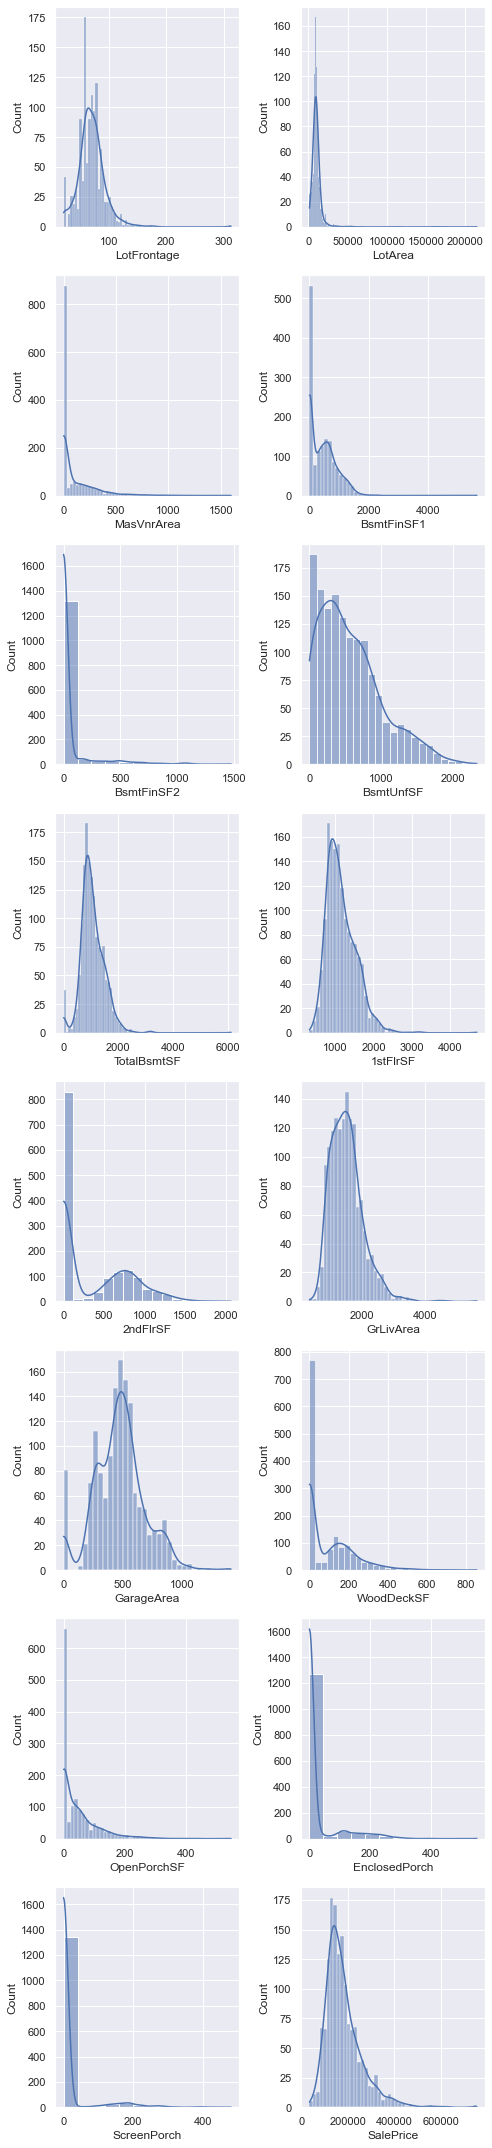

In [22]:
#Rechecking the distribution of the data 
plt.figure(figsize=(7,30))
for i in range (len(continuous_features)):
    plt.subplot(8, 2, i+1)
    sns.histplot(x=data[continuous_features[i]], kde=True)
    plt.tight_layout()

# observation

As you see almost all the variables are skewed towards right side, so log normal distribution
can be used to normalize these features.

salesprice is approximately normally distributed.

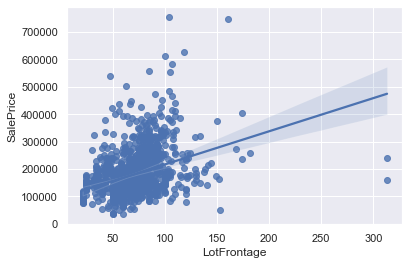

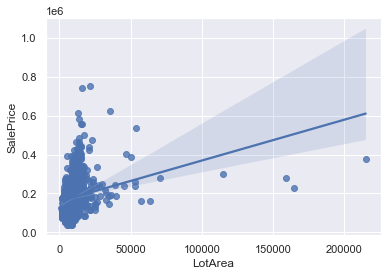

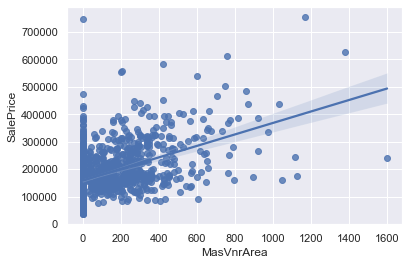

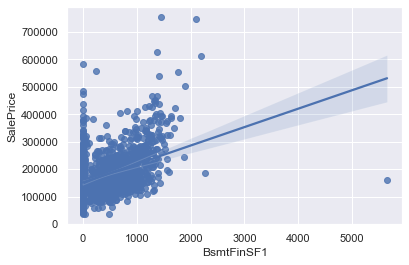

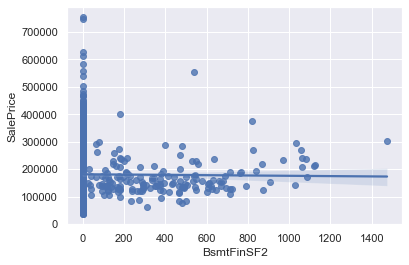

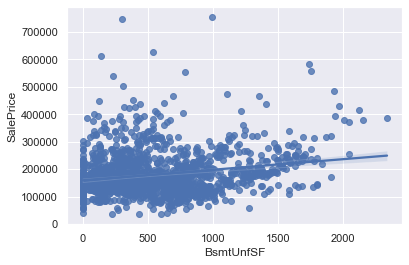

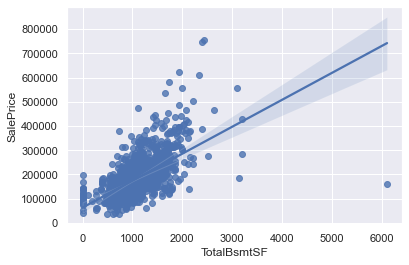

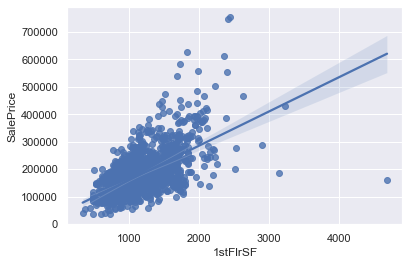

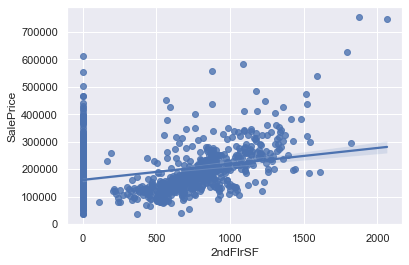

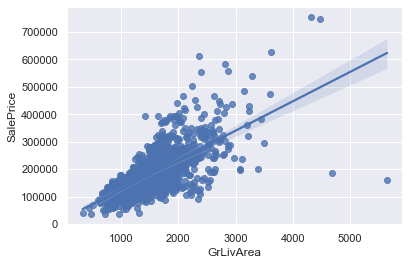

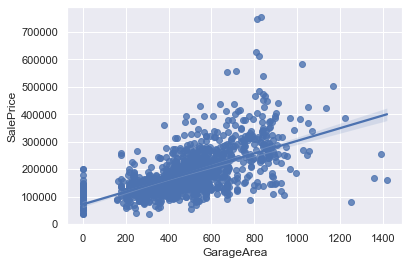

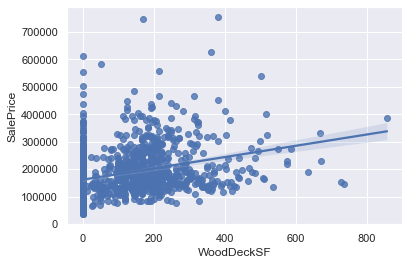

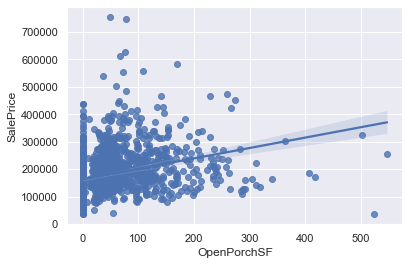

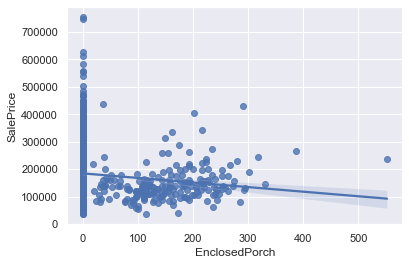

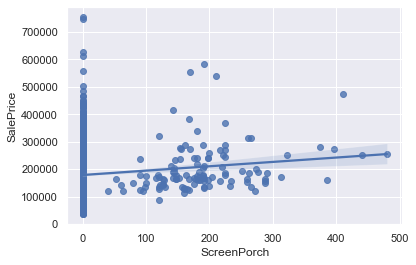

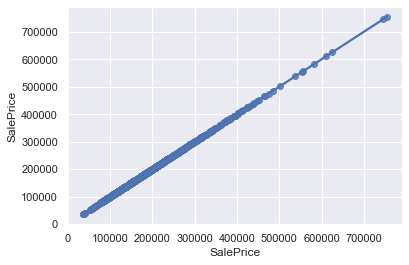

In [23]:
# drawing scatterplot to find out the relationship between continuous features and the target feature

for i in range (len(continuous_features)):
    sns.regplot(x=continuous_features[i], y='SalePrice', data=data)
    plt.show()

# observation

All the variables are positively corelated with the target variables

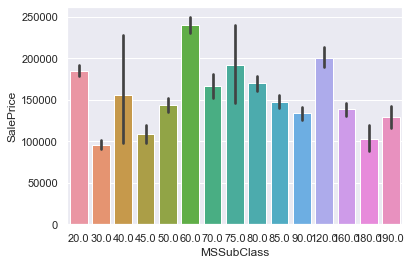

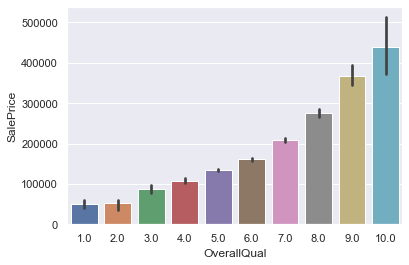

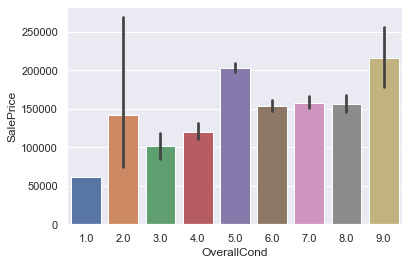

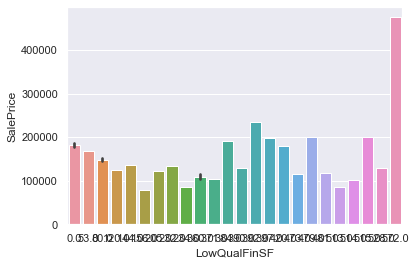

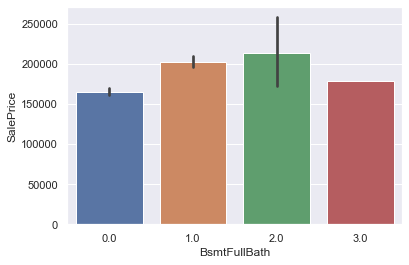

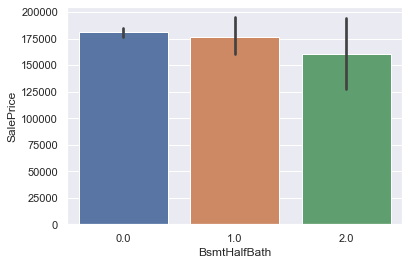

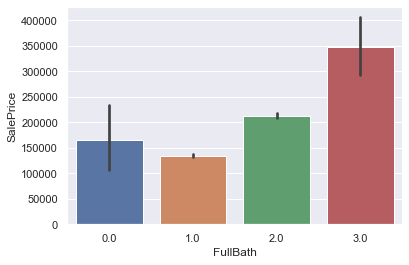

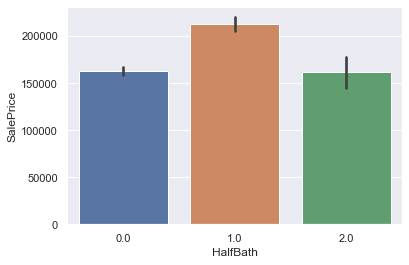

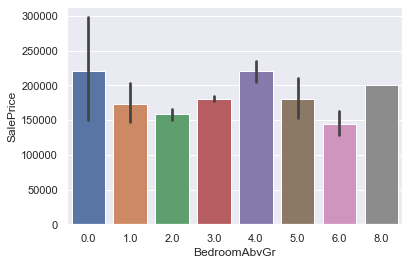

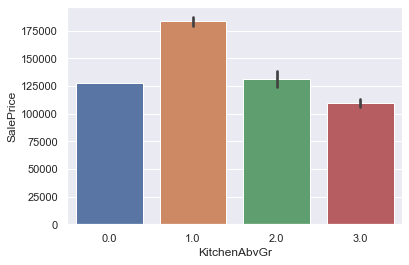

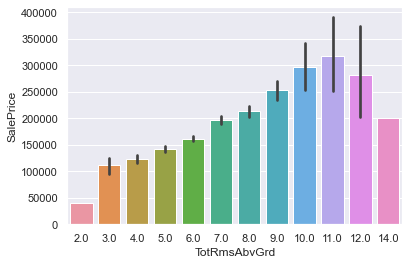

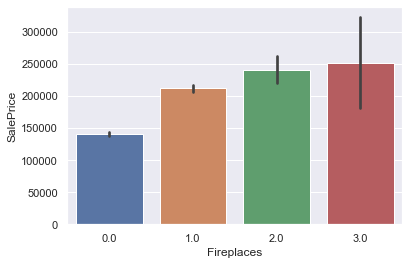

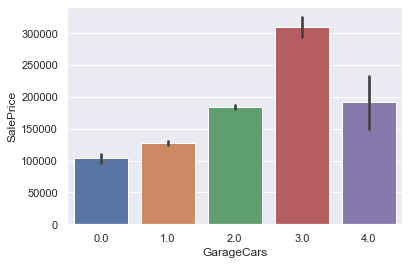

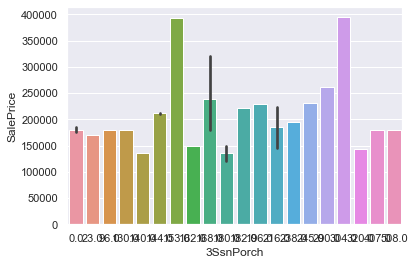

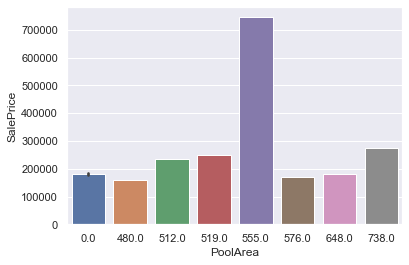

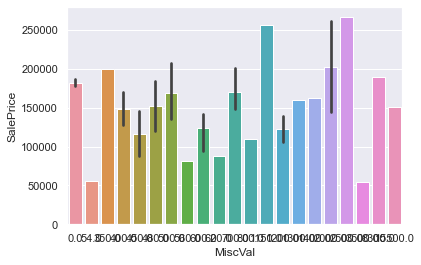

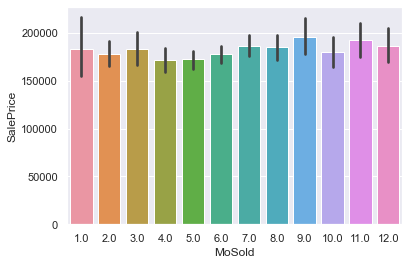

In [24]:
#comparing the discrete features with saleprice feature
for i in range(len(discrete_features)):
    sns.barplot(x=discrete_features[i], y='SalePrice', data=data)
    plt.show()

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


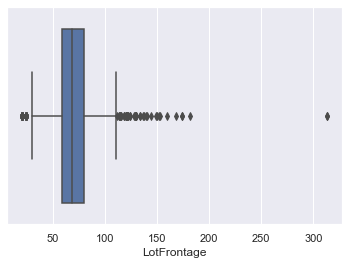

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


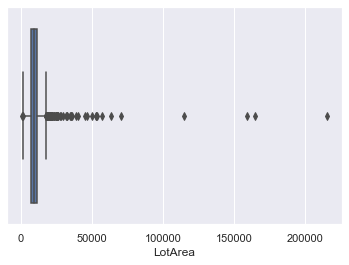

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


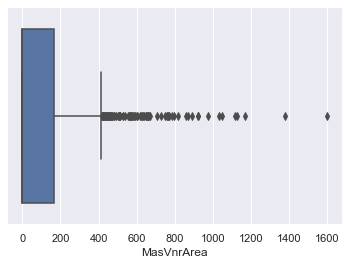

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


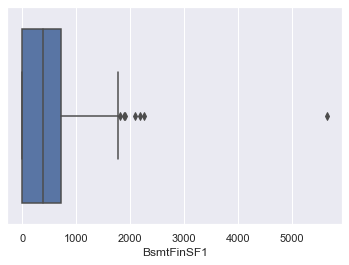

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


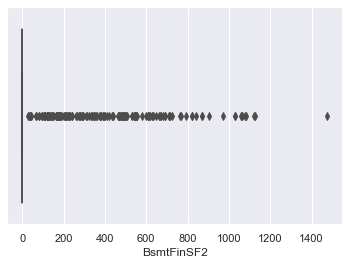

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


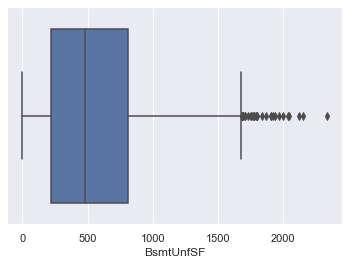

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


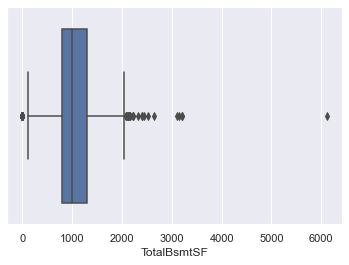

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


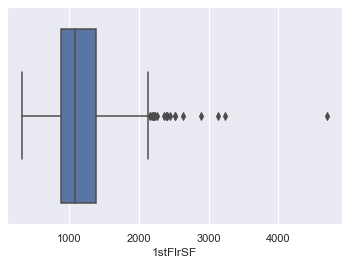

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


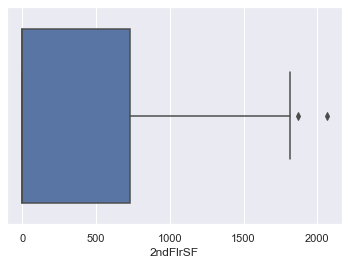

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


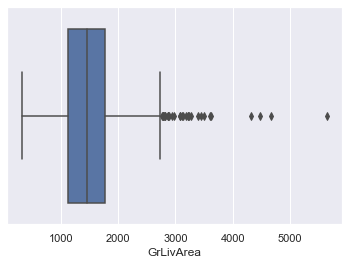

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


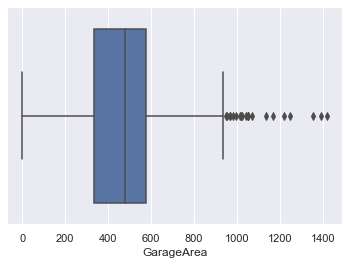

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


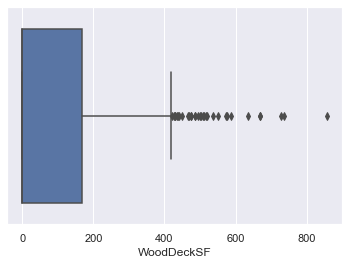

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


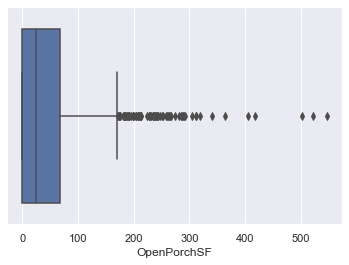

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


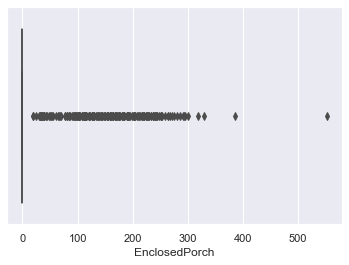

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


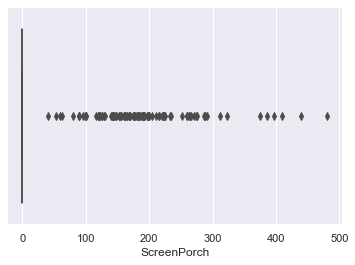

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


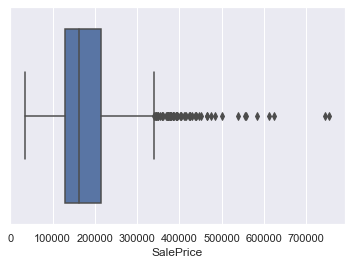

In [25]:
#checking the outliers present in the continuous features

for i in range(len(continuous_features)):
    sns.boxplot(continuous_features[i], data=data)
    plt.show()

# observation

All the continuous features have outliers present in the upper side. remove the extreme outliers
present in the feature.

In [26]:
#corelation between discrete and target variables
data[discrete_features].corr()

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold
MSSubClass,1.000000,0.032628,-0.059316,0.046474,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.040380,-0.045569,-0.040110,-0.043825,0.008283,-0.007683,-0.013585
OverallQual,0.032628,1.000000,-0.091932,-0.030429,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.600671,0.030371,0.065166,-0.031406,0.070815
OverallCond,-0.059316,-0.091932,1.000000,0.025494,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,-0.185758,0.025504,-0.001985,0.068777,-0.003511
LowQualFinSF,0.046474,-0.030429,0.025494,1.000000,-0.047143,-0.005842,-0.000710,-0.027080,0.105607,0.007522,0.131185,-0.021272,-0.094480,-0.004296,0.062157,-0.003793,-0.022174
BsmtFullBath,0.003491,0.111098,-0.054942,-0.047143,1.000000,-0.147871,-0.064512,-0.030905,-0.150673,-0.041503,-0.053275,0.137928,0.131881,-0.000106,0.067616,-0.023047,-0.025361
BsmtHalfBath,-0.002333,-0.040150,0.117821,-0.005842,-0.147871,1.000000,-0.054536,-0.012340,0.046519,-0.037944,-0.023836,0.028976,-0.020891,0.035114,0.020025,-0.007367,0.032873
FullBath,0.131608,0.550600,-0.194149,-0.000710,-0.064512,-0.054536,1.000000,0.136381,0.363252,0.133115,0.554784,0.243671,0.469672,0.035353,0.049604,-0.014290,0.055872
HalfBath,0.177354,0.273458,-0.060769,-0.027080,-0.030905,-0.012340,0.136381,1.000000,0.226651,-0.068263,0.343415,0.203649,0.219178,-0.004972,0.022381,0.001290,-0.009050
BedroomAbvGr,-0.023438,0.101676,0.012980,0.105607,-0.150673,0.046519,0.363252,0.226651,1.000000,0.198597,0.676620,0.107570,0.086106,-0.024478,0.070703,0.007767,0.046544
KitchenAbvGr,0.281721,-0.183882,-0.087001,0.007522,-0.041503,-0.037944,0.133115,-0.068263,0.198597,1.000000,0.256045,-0.123936,-0.050634,-0.024600,-0.014525,0.062341,0.026589


<AxesSubplot:>

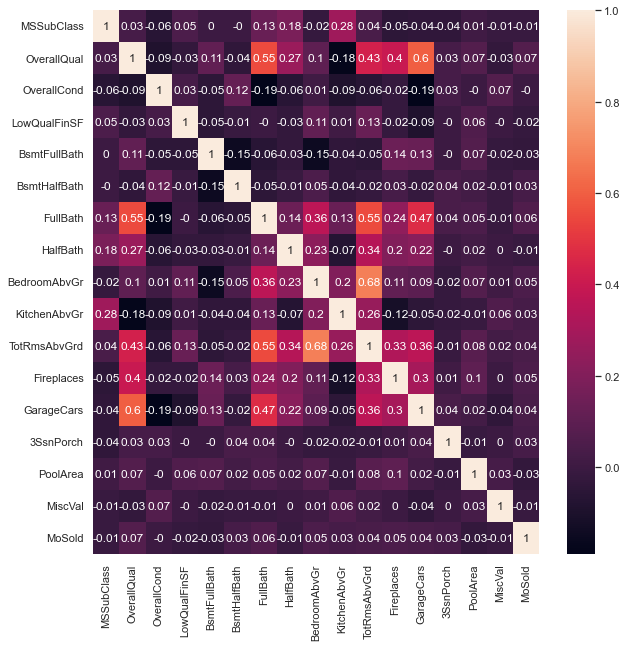

In [27]:
#heatmap to understand the corelations
plt.figure(figsize=(10,10))
sns.heatmap(round(data[discrete_features].corr(), 2), annot=True)

# observation

There is no high corelation between the discrete features and the target feature. so, there
is no possibility of multicolinearity.

In [28]:
#checking the corelation between continuous features and SalePrice
round(data[continuous_features].corr(), 2)

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice
LotFrontage,1.00,0.43,0.19,0.23,0.05,0.13,0.39,0.46,0.08,0.40,0.34,0.09,0.15,0.01,0.04,0.35
LotArea,0.43,1.00,0.10,0.21,0.11,-0.00,0.26,0.30,0.05,0.26,0.18,0.17,0.08,-0.02,0.04,0.26
MasVnrArea,0.19,0.10,1.00,0.26,-0.07,0.11,0.36,0.34,0.17,0.39,0.37,0.16,0.13,-0.11,0.06,0.48
BsmtFinSF1,0.23,0.21,0.26,1.00,-0.05,-0.50,0.52,0.45,-0.14,0.21,0.30,0.20,0.11,-0.10,0.06,0.39
BsmtFinSF2,0.05,0.11,-0.07,-0.05,1.00,-0.21,0.10,0.10,-0.10,-0.01,-0.02,0.07,0.00,0.04,0.09,-0.01
BsmtUnfSF,0.13,-0.00,0.11,-0.50,-0.21,1.00,0.42,0.32,0.00,0.24,0.18,-0.01,0.13,-0.00,-0.01,0.21
TotalBsmtSF,0.39,0.26,0.36,0.52,0.10,0.42,1.00,0.82,-0.17,0.45,0.49,0.23,0.25,-0.10,0.08,0.61
1stFlrSF,0.46,0.30,0.34,0.45,0.10,0.32,0.82,1.00,-0.20,0.57,0.49,0.24,0.21,-0.07,0.09,0.61
2ndFlrSF,0.08,0.05,0.17,-0.14,-0.10,0.00,-0.17,-0.20,1.00,0.69,0.14,0.09,0.21,0.06,0.04,0.32
GrLivArea,0.40,0.26,0.39,0.21,-0.01,0.24,0.45,0.57,0.69,1.00,0.47,0.25,0.33,0.01,0.10,0.71


<AxesSubplot:>

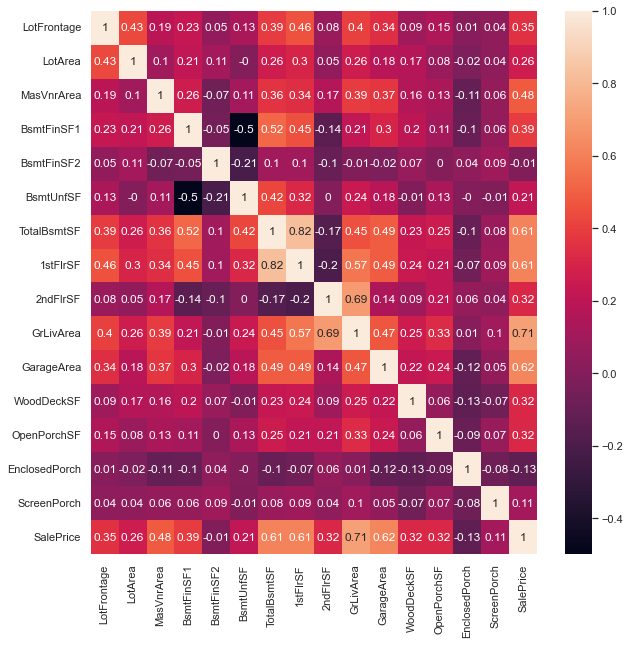

In [29]:
#heatmap to understand the corelation
plt.figure(figsize=(10,10))
sns.heatmap(round(data[continuous_features].corr(), 2), annot=True)

# observation 

1. 1stflrsf and totalbsntsf have corelation of 0.82
2. rest of all the features are moderately corelated to each other
3. multicolinearity may have exists between 1stflrsf and totalbsntsf

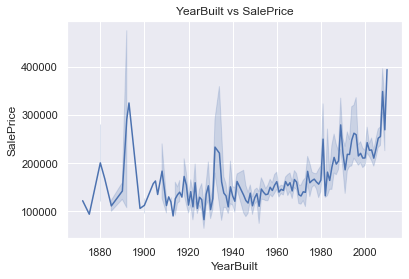

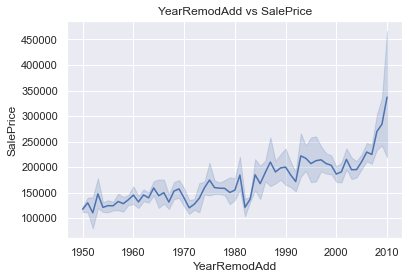

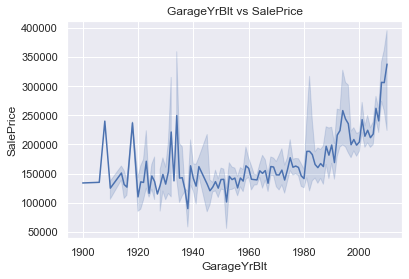

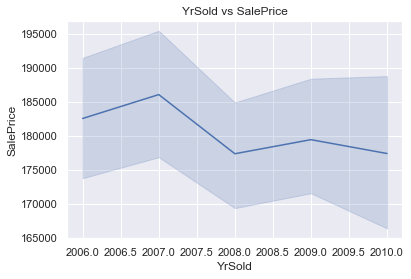

In [30]:
#comparing year feature with SalePrice
for i in year_feature:
    sns.lineplot(x=i, y='SalePrice', data=data)
    plt.title('{} vs SalePrice'.format(i))
    plt.show()

# observation

1. salesprice is increasing with the year build the house
2. yearremoadd and garageyrblt increase with year
3. the sale price is decreases with the year sold